In [1]:
import pandas as pd
data=pd.read_csv('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem4/ADA/AirPassengers.csv')
data.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [2]:
data.isnull().sum()

date     0
value    0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    144 non-null    datetime64[ns]
 1   value   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
data=data.set_index('date',inplace=False)
data.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


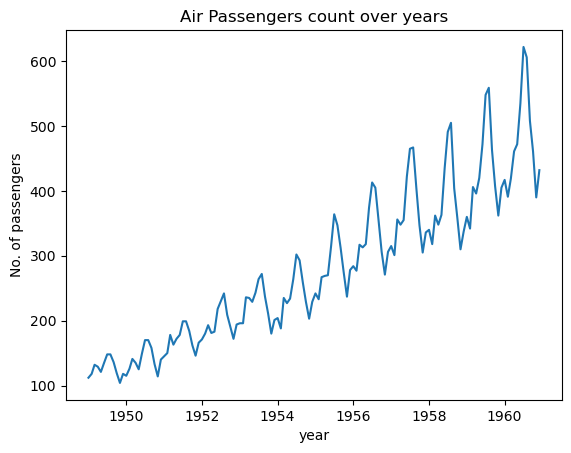

In [17]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.xlabel('year')
plt.ylabel('No. of passengers')
plt.title('Air Passengers count over years')
plt.show(block=False)

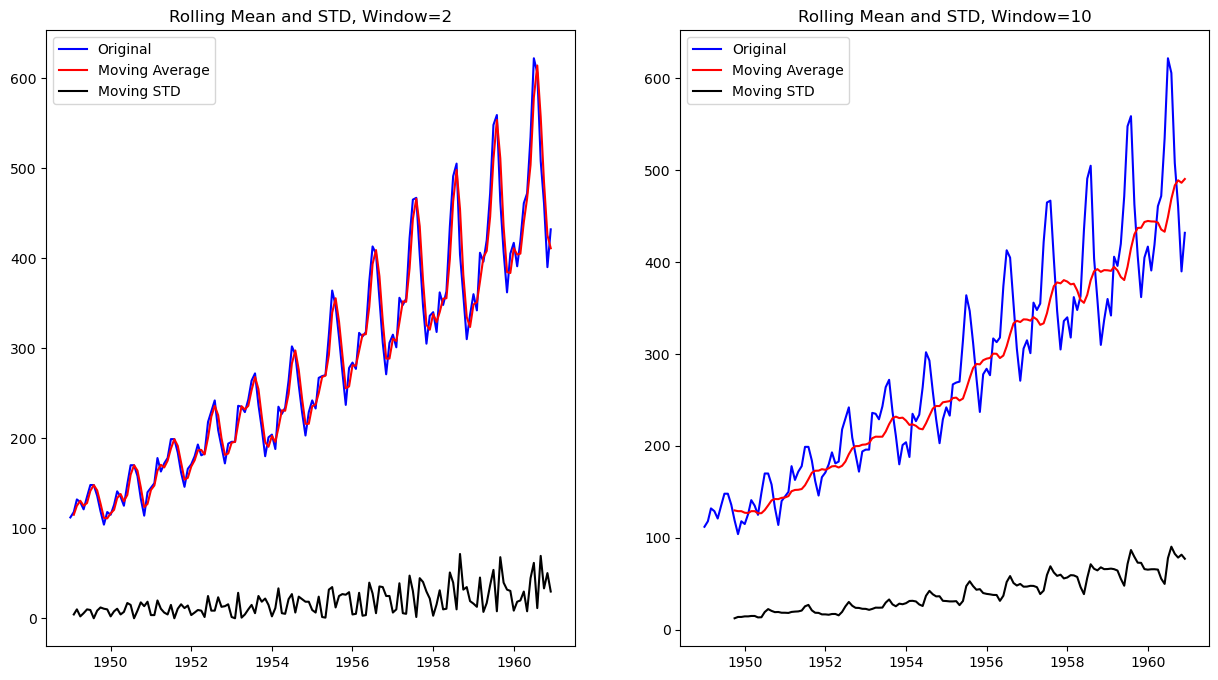

In [7]:
movingAverage=data['value'].rolling(window=2).mean()
movingSTD=data['value'].rolling(window=2).std()
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(data,color='blue',label='Original')
plt.plot(movingAverage,color='red',label='Moving Average')
plt.plot(movingSTD,color='black',label='Moving STD')
plt.legend(loc='best')
plt.title('Rolling Mean and STD, Window=2')
movingAverage1=data['value'].rolling(window=10).mean()
movingSTD1=data['value'].rolling(window=10).std()
plt.subplot(1,2,2)
plt.plot(data,color='blue',label='Original')
plt.plot(movingAverage1,color='red',label='Moving Average')
plt.plot(movingSTD1,color='black',label='Moving STD')
plt.legend(loc='best')
plt.title('Rolling Mean and STD, Window=10')
plt.show(block=False)

## ADF Test
### if test statistic < critical value and p-value < 0.05 we reject null hypothesis(Non stationary)

In [12]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('Results of ADF test')
    datatest=adfuller(timeseries)
    dataoutput=pd.Series(datatest[0:4],index=['Test Statistic','p-value','#lags used','#observations used'])
    for key,value in datatest[4].items():
        dataoutput['Critical value (%s)'%key]=value
    print(dataoutput)

adf_test(data['value'])

Results of ADF test
Test Statistic            0.815369
p-value                   0.991880
#lags used               13.000000
#observations used      130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


### in this case we fail to reject H0, therefore data is non-stationary

## KPSS test
### if test statistic < critical value and p-value < 0.05 we fail to reject null hypothesis(Stationary)

In [15]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print('Results of KPSS test')
    datatest=kpss(timeseries,regression='c',nlags="auto")
    dataoutput=pd.Series(datatest[0:3],index=['Test Statistic','p-value','#lags used'])
    for key,value in datatest[3].items():
        dataoutput['Critical value (%s)'%key]=value
    print(dataoutput)

kpss_test(data['value'])

Results of KPSS test
Test Statistic           1.651312
p-value                  0.010000
#lags used               8.000000
Critical value (10%)     0.347000
Critical value (5%)      0.463000
Critical value (2.5%)    0.574000
Critical value (1%)      0.739000
dtype: float64


/var/folders/_t/p1thpgyj6yv2d7xmn803p8tw0000gn/T/ipykernel_28002/2009075766.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  datatest=kpss(timeseries,regression='c')


### in this case we reject H0, therefore data is non-stationary

## converting non-stationary to stationary- differencing

<Axes: xlabel='date'>

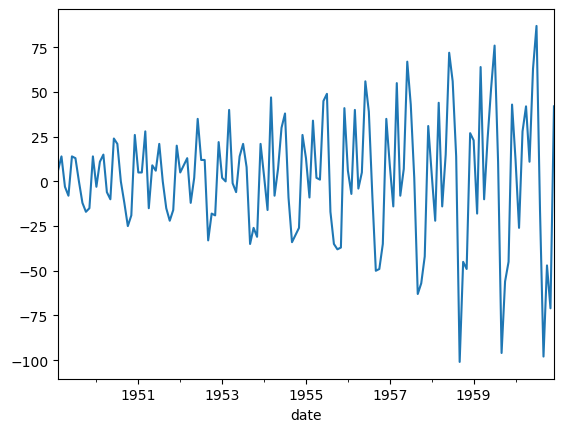

In [10]:
data['value_s']=data['value']-data['value'].shift(1)
data['value_s'].dropna().plot()

<Axes: xlabel='date'>

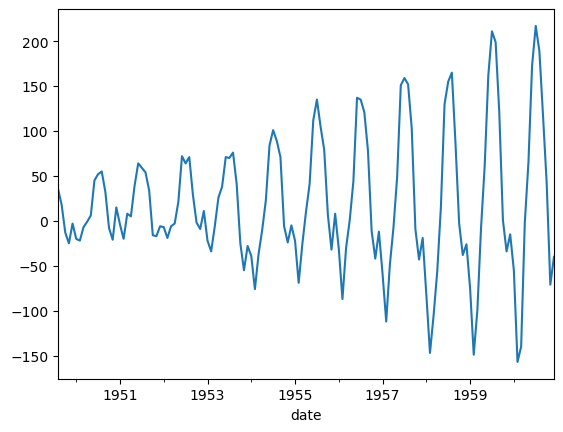

In [11]:
n=7
data['value_sn']=data['value']-data['value'].shift(n)
data['value_sn'].dropna().plot()

## Transformation
### log when range is high
### power when values are too small
### square root when values are high

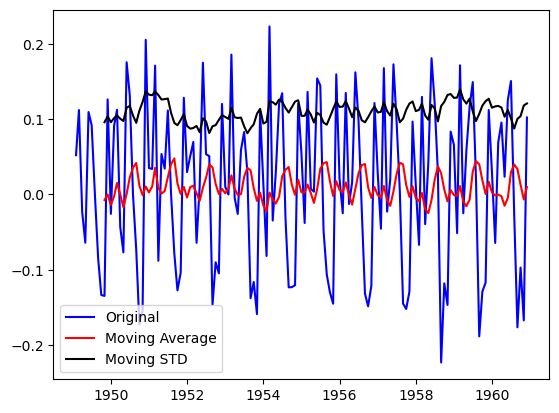

In [20]:
import numpy as np
data['log']=np.log(data['value'])
data['diff_log']=data['log']-data['log'].shift(1)
difmovingAverage=data['diff_log'].rolling(window=10).mean()
difmovingSTD=data['diff_log'].rolling(window=10).std()
plt.plot(data['diff_log'],color='blue',label='Original')
plt.plot(difmovingAverage,color='red',label='Moving Average')
plt.plot(difmovingSTD,color='black',label='Moving STD')
plt.legend(loc='best')


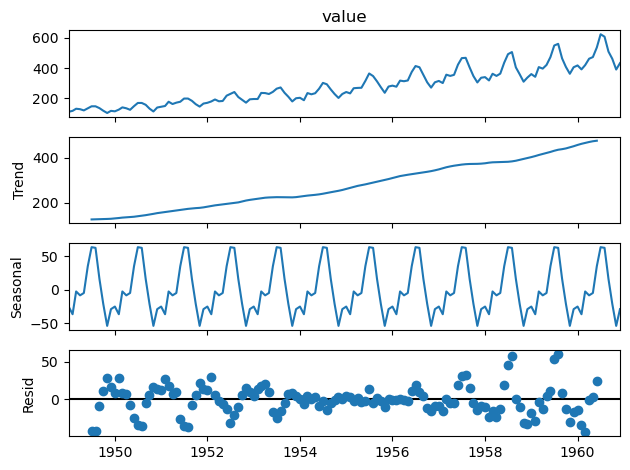

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['value'],model="additive")

decomposition.plot()
plt.show()

In [15]:
decomposition.trend

date
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

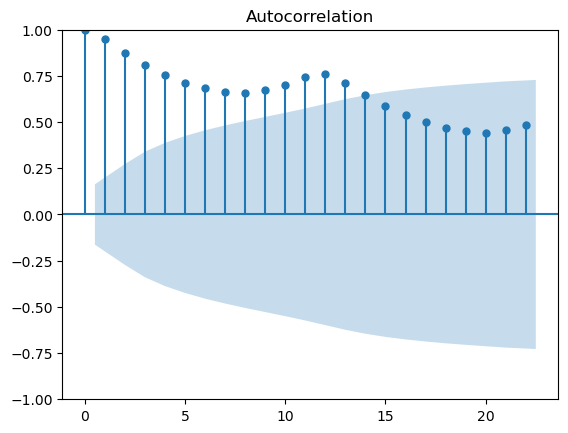

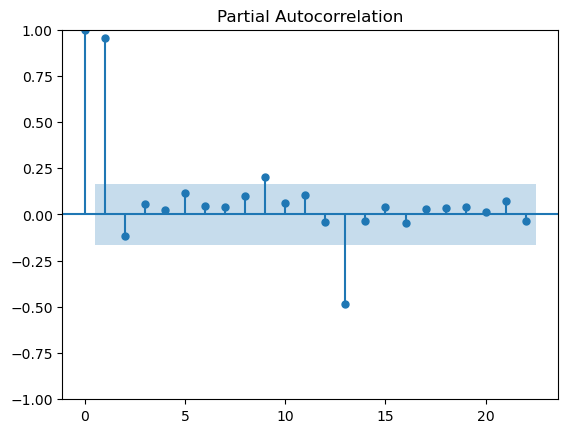

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(data['value'])
plt.show()

plot_pacf(data['log'])
plt.show()

Plotting AR Model


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


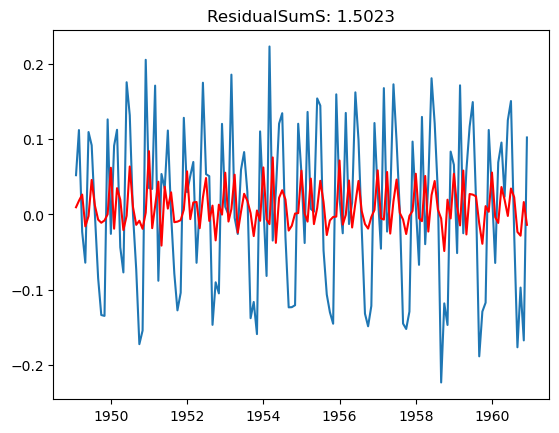

In [23]:
from matplotlib import pyplot
#from pandas.plotline import lag_plot

from statsmodels.tsa.arima.model import ARIMA

ts_log = np.log(data['value']).diff().dropna()
model1 = ARIMA(ts_log, order=(2,0,0))
plt.plot(ts_log)


results_AR = model1.fit()
plt.plot(results_AR.fittedvalues,color="red")
plt.title("ResidualSumS: %.4f"%sum((results_AR.fittedvalues-ts_log)**2))
print("Plotting AR Model")

Plotting AR Model


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


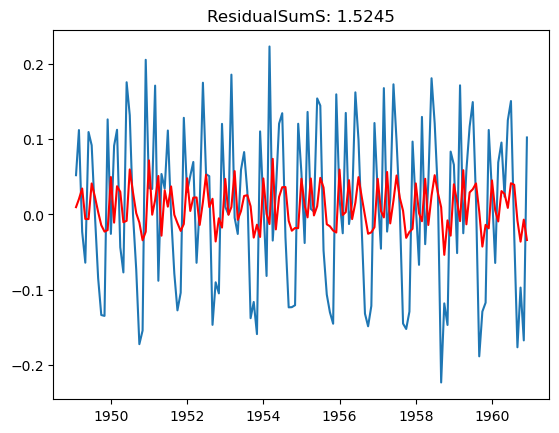

In [18]:
from matplotlib import pyplot
#from pandas.plotline import lag_plot

from statsmodels.tsa.arima.model import ARIMA

ts_log = np.log(data['value']).diff().dropna()
model1 = ARIMA(ts_log, order=(0,0,1))
plt.plot(ts_log)


results_AR = model1.fit()
plt.plot(results_AR.fittedvalues,color="red")
plt.title("ResidualSumS: %.4f"%sum((results_AR.fittedvalues-ts_log)**2))
print("Plotting AR Model")

Plotting AR Model


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


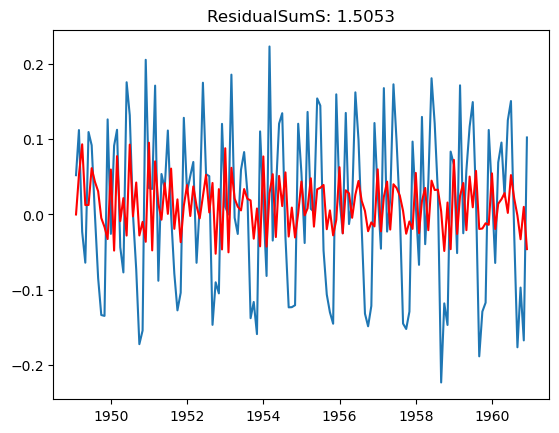

In [19]:
from matplotlib import pyplot
#from pandas.plotline import lag_plot

from statsmodels.tsa.arima.model import ARIMA

ts_log = np.log(data['value']).diff().dropna()
model1 = ARIMA(ts_log, order=(2,1,2))
plt.plot(ts_log)


results_AR = model1.fit()
plt.plot(results_AR.fittedvalues,color="red")
plt.title("ResidualSumS: %.4f"%sum((results_AR.fittedvalues-ts_log)**2))
print("Plotting AR Model")